# EXAMINATION QUESTIONS

Examination in **DAT200** Applied Machine Learning I

**Time for exams**

* Day and date: *Friday, 15.05.2020*
* As from - to and duration of examinations (hours): *09:00 to 12:30 (3.5 hours)*

**Course responsible**: Oliver Tomic and Kristian Hovde Liland

**External examiner**: Per-Arne Andersen

**Permissible aids**: C3 - all types of calculators, all other aids

---

**Required software / packages**

* scikit-learn
* mlxtend

**Your code and your answers**

* There are separate cells for your code and answers.
  * Edit answer cells for theoretical questions, but leave the heading (Answer x. y))
* You may add extra code cells as you want to give better organisation and runnability.
* During correction of exams, your code is expected to run without warnings or errors, but will be assesed regardless.
* Make backups and save as you go.

---

__Total number of exercises__: 7

__Total number points__: 100

---

## Exercise 1 - feature importance permutation (24 points)

You are given a data file (*mushroom.txt*) that contains information on mushrooms. Your task is to determine **which properties** of the mushrooms are the most important for **distinguishing** whether a mushroom is **poisonous** (*Norwegian: giftig*) or **edible** (*Norwegian: spiselig*). You will make your decision based on **feature importances** computed by use of  **feature importance permutation**.

Information on features and target contained in *mushroom.txt*

* *shape*: categorical
* *surface*: categorical
* *color*: categorical
* *target*: categorical


### Exercise 1. a) (9 points)

Load and prepare your data, such that you can use it for training classifiers in scikit-learn.

In [1]:
# Code for 1. a)

# =============================================================================
# Import modules
# =============================================================================
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.evaluate import feature_importance_permutation

In [2]:
# =============================================================================
# Load and preprocess data for analysis
# =============================================================================

# Load data from file and visualise
mushroom = pd.read_csv("data/mushroom.txt", sep='\t', index_col=0)
mushroom

,shape,surface,color,target
0,convex,smooth,yellow,edible
1,bell,smooth,white,edible
2,convex,scaly,white,poisonous
3,convex,smooth,gray,edible
4,convex,scaly,yellow,edible
...,...,...,...,...
8118,knobbed,smooth,brown,edible
8119,convex,smooth,brown,edible
8120,flat,smooth,brown,edible
8121,knobbed,scaly,brown,poisonous


In [3]:
# Get X. Leave out target
X = mushroom.iloc[:, :-1]
X

,shape,surface,color
0,convex,smooth,yellow
1,bell,smooth,white
2,convex,scaly,white
3,convex,smooth,gray
4,convex,scaly,yellow
...,...,...,...
8118,knobbed,smooth,brown
8119,convex,smooth,brown
8120,flat,smooth,brown
8121,knobbed,scaly,brown


In [4]:
# Get target
y = mushroom.iloc[:, -1]
y

0          edible
1          edible
2       poisonous
3          edible
4          edible
          ...    
8118       edible
8119       edible
8120       edible
8121    poisonous
8122       edible
Name: target, Length: 8123, dtype: object

In [5]:
# The three features in X are categorical. Convert to dummy features.
X = pd.get_dummies(X)
X

,shape_bell,shape_conical,shape_convex,shape_flat,shape_knobbed,shape_sunken,surface_fibrous,surface_grooves,surface_scaly,surface_smooth,color_brown,color_buff,color_cinnamon,color_gray,color_green,color_pink,color_purple,color_red,color_white,color_yellow
0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
8119,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
8120,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
8121,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0


In [6]:
# Convert target from text to integers
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 1, ..., 0, 1, 0])

### Exercise 1. b) (10 points)

**Instructions**

1. Do **one** train-test split with `testsize=0.3` and `random_state=2`.

2. For feature importance permutation use the `feature_importance_permutation` function which is implemented in the python package **mlxtend** 

    https://rasbt.github.io/mlxtend/user_guide/evaluate/feature_importance_permutation/. 
    
    For the parameters use:

    * `metric='accuracy'`
    * `num_rounds=5`
    * `seed=1`

3. **Compute** and **plot** feature importances for the classifiers listed below. Plot in the same manner as shown in the documentation of `feature_importance_permutation`, that is **bars** and **standard deviations** for each feature importance.
    
    * Logistic regression (use `C=10`, `solver='lbfgs'`, `n_jobs=-1`, `random_state=1`)
    * Random forest classifier (use `n_estimators=50`, `n_jobs=-1`, `random_state=1`)
    * K nearest neighbour classifier (use `metric='minkowski'`, `n_jobs=-1`)

**NOTE**: Do not use the built-in feature importance in the random forest classifier. 

In [7]:
# Code for 1. b)

# Split into training and test data as requested
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=2, stratify=y)

# Scale training and test data
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [8]:
# Set the number of rounds for permutation
num_rounds = 5

Training accuracy 66.19767850861766
Test accuracy 67.21378744357817


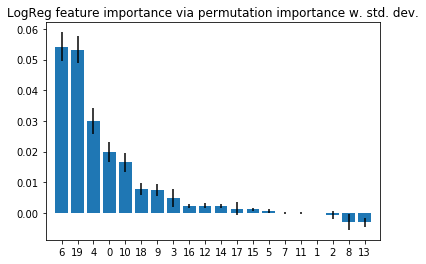

In [9]:
# =============================================================================
# Logistic regression
# =============================================================================

lr = LogisticRegression(C=10, solver='lbfgs', n_jobs=-1, random_state=1)
lr.fit(X_train_sc, y_train)

print('Training accuracy', np.mean(lr.predict(X_train_sc) == y_train)*100)
print('Test accuracy', np.mean(lr.predict(X_test_sc) == y_test)*100)


imp_vals, imp_all = feature_importance_permutation(
    predict_method=lr.predict, 
    X=X_test_sc,
    y=y_test,
    metric='accuracy',
    num_rounds=num_rounds,
    seed=1)

std = np.std(imp_all, axis=1)
indices = np.argsort(imp_vals)[::-1]

plt.figure()
plt.title("LogReg feature importance via permutation importance w. std. dev.")
plt.bar(range(X.shape[1]), imp_vals[indices],
        yerr=std[indices])
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

Training accuracy 71.36827295110798
Test accuracy 71.85063602790316


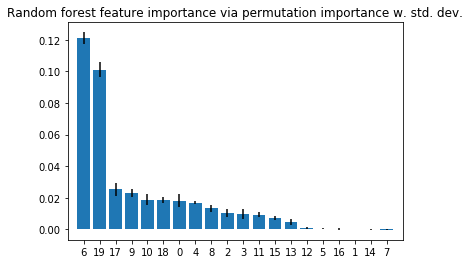

In [10]:
# =============================================================================
# Random forest feature importance permutation
# =============================================================================
rf = RandomForestClassifier(n_estimators=50,
                            random_state=1,
                            n_jobs=-1)

rf.fit(X_train, y_train)

print('Training accuracy', np.mean(rf.predict(X_train) == y_train)*100)
print('Test accuracy', np.mean(rf.predict(X_test) == y_test)*100)


imp_vals, imp_all = feature_importance_permutation(
    predict_method=rf.predict, 
    X=X_test.values,
    y=y_test,
    metric='accuracy',
    num_rounds=num_rounds,
    seed=1)

std = np.std(imp_all, axis=1)
indices = np.argsort(imp_vals)[::-1]

plt.figure()
plt.title("Random forest feature importance via permutation importance w. std. dev.")
plt.bar(range(X.shape[1]), imp_vals[indices],
        yerr=std[indices])
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

Training accuracy 71.36827295110798
Test accuracy 71.85063602790316


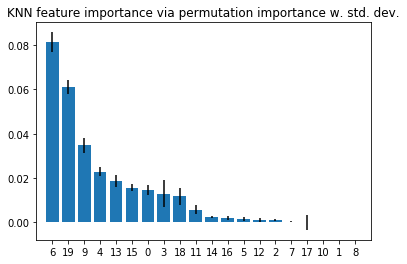

In [11]:
# =============================================================================
# KNN feature importance permutation
# =============================================================================
knn = KNeighborsClassifier(metric='minkowski',
                           n_jobs=-1)
knn.fit(X_train_sc, y_train)

print('Training accuracy', np.mean(rf.predict(X_train) == y_train)*100)
print('Test accuracy', np.mean(rf.predict(X_test) == y_test)*100)


imp_vals, imp_all = feature_importance_permutation(
    predict_method=knn.predict, 
    X=X_test_sc,
    y=y_test,
    metric='accuracy',
    num_rounds=num_rounds,
    seed=1)

std = np.std(imp_all, axis=1)
indices = np.argsort(imp_vals)[::-1]

plt.figure()
plt.title("KNN feature importance via permutation importance w. std. dev.")
plt.bar(range(X.shape[1]), imp_vals[indices],
        yerr=std[indices])
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

### Exercise 1. c) (2 points)

**Question**: Based on the feature importances you just computed with the three classifiers: 

**Name the top two most important properties of the mushrooms** for distinguishing whether a mushroom is edible or not. The results may vary a bit across the classifiers, therefore pick properties that seem to be consistent across classifiers. Do not provide the index only, provide also the name of the property.


In [12]:
# Code for 1. c)
list(X.columns)[6]

'surface_fibrous'

In [13]:
list(X.columns)[19]

'color_yellow'

### Exercise 1. d) (3 points)

__Question__

The feature importances that you computed in the above exercise may not give you a very robust or optimal estimate of feature importance. **Name three remedies or actions that you could do to improve the reliability of the estimates (of the feature importance)**.

__Answer 1. d)__

There are a number of possible remedies: (three out of this list will be enough)

1. Increase number of rounds for the permutations
2. Use multiple train-test splits and average importances across those
3. Compute drop column feature importance, since they provide the ground truth
4. The hyperparameters of the classifiers are not tuned. Tune them and do feature importance permutation again with better performing classifiers


---

## Exercise 2 - Logistic regression (12 points)

You have trained a logistic regression classifier in scikit-learn on a dataset that has 347 samples and 17 features. Assume that this is your final model after hyperparameter tuning and validation. There are 8 different classes in the dataset. 

### Exercise 2. a) (4 points)

__Questions__

1. What is the dimension of the array that holds the class probabilities of all training samples?

2. What do the rows and columns represent in that array?

__Answers 2. a)__

1. The dimensions of that array are $(347 \times 8)$.
2. The rows represent samples and the columns represent the probability of the sample belonging to each of classes.

### Exercise 2. b) (4 points)

__Question__

What is the number of weights in your classifier? Explain how you find that number.

__Answer 2. b)__

* We have a One-vs-All (One-vs-Rest) situation since logistic regression is a binary classifier
* This means that with 8 classes we have a total of 8 models
* We have a total of 17 features
* Total number of weights: 8 models * (17 features + 1 bias) = 144

### Exercise 2. c) (4 points)

__Questions__

Assume that your logistic regression model is done training and that it classifies all samples in the training data correctly. Is it possible that the total cost of the last training epoch is non-zero, even if the model predicts all training samples correctly? Explain why.

__Answer 2. c)__

* Yes, it is possible that the total cost is non-zero even though all samples are classified correctly. 
* Example: if the label of a sample is $1$ and its $\phi(z)=0.98$ it will be classified correctly, but the cost is non-zero: $-log(0.98) = 0.00878$ for that sample. Note that the total cost is computed across all samples after the epoch.
* The above situation may happen when the optimisation of weights is stopped because all samples are correctly classified during training.

---

## Exercise 3 - Decision Trees (8 points)

This exercise contains questions regarding the decision tree classifier algorithm.

### Exercise 3. a) (4 points)

__Question__

Can binary decision trees be used for multiclass classification problems? Explain why.

__Answers 3. a)__:  

Yes, binary decision trees can be used for multiclass classification problems. The specific property of binary decision trees is that they split the samples of a parent node into exactly two child nodes. They do so regardless of the number of classes. 

### Exercise 3. b) (4 points)

__Question__

Consider the impurity measure **entropy**. Is the maximum entropy in a node dependent on the number of classes? Provide simple computations that support your answer.

__Answers 3. b)__:  

Yes, the maximum entropy is dependent on the number of classes.

Maximum entropy occurs when class distribution in a node is uniform. One can support the answer by computing the entropy for different number of classes with the assumption that the class distribution is uniform.

$p(i|t)$ is the proportion of samples belonging to class $i$ in a particular node $t$.

Entropy $I_{H}(t) = - \sum_{i=1}^{c} p(i|t)log_{2}p(i|t)$ 

__2 classes__:

Uniform distribution means that p(i|t) = 0.5 for each class.
Entropy IH = - ( 0.5 * log2(0.5) + 0.5 * log2(0.5) = - (0.5 * -1 + 0.5 * -1) = 1

__4 classes__:

Uniform distribution means that p(i|t) = 0.25 for each class.
Entropy IH = - ( 0.25 * log2(0.25) + 0.25 * log2(0.25) + 0.25 * log2(0.25) + 0.25 * log2(0.25)) = - (0.25 * -2 + 0.25 * -2 + 0.25 * -2 + 0.25 * -2) = 2

The computation proves that the entropy for 4 classes is twice as high as the entropy for two classes.

---

## Exercise 4 - Dimensionality reduction and feature extraction (16 points)

You have a dataset with 288 samples and 8 features ($X$) and one target ($y$). The dataset has four classes.

### Exercise 4. a) (4 points)

__Question__

First you use PCA (principal component analysis) to extract four features from it, or in other words four principal components. 

1. What is the dimension of the transformed array $X'$? What do the rows and columns represent?
2. What is the dimension of the transformation array $W$?
3. What is the dimension of the covariance matrix $\Sigma$?

__Answers 4. a)__

1. $(288 \times 4)$. Rows represent samples, columns represent principal components.
2. $(8 \times 4)$
3. $(8 \times 8)$

### Exercise 4. b) (4 points)

__Question__

Assume that the following eigenvalues have been extracted from $X$ (see below). What would be the cumulative explained variance for the first two components (sum of PC1 and PC2)?

In [14]:
eigenvalues = [4, 36, 19, 78, 2, 43, 11, 50]

In [15]:
# Code for 4. b)
# Sort eigenvalues by size
eigenvalues.sort(reverse=True)
eigenvalues

[78, 50, 43, 36, 19, 11, 4, 2]

In [16]:
# Compute sum over all eigenvalues
sum(eigenvalues)

243

In [1]:
# The sum of the explained variance from PC1 and PC2 is the sum of the two highest eigenvalues devided by the sum of all eigenvalues
(78 + 50) / 243

0.5267489711934157

### Exercise 4. c) (4 points)

__Question__

Now let us assume that you now use LDA (Linear Discriminant Analysis) to extract features. How many features can you extract from the data? Show how you compute that number.

__Answer 4. c)__

The maximum number of features one can extract from the dataset is $c - 1$, where $c$ represents the number of classes. This means that the maximum number of features one can extract here is $4 - 1 = 3$.

### Exercise 4. d) (4 points)

__Questions__

1. What are the dimensions of the within-scatter matrix $S_{W}$?
2. What are the dimensions of the between-scatter matrix $S_{B}$?

__Answer 4. d)__

1. $(8 \times 8)$
2. $(8 \times 8)$

---

## Exercise 5 - regression (8 points)

### Exercise 5. a) (4 points)

A regression model has been fitted on ( _Xtrain, Ytrain_ ) and predictions have been performed on new data ( _Xtest, Ytest_ ). The scoring returned: $R^2 = -0.2$ for the new data.  
  
__Questions:__  
1. In general, how can $R^2$ become negative with respect to how it is calculated?  
2. What could be reasons for this kind of model performance (give at least two reasons)?

__Answers 5. a)__:  
1. :  $R^2$ = 1 - SSE/SST. If the prediction error is so large that SSE > SST, $R^2$ becomes negative.
2. : (1) Little information about the target in the features. (2) Too simple model. (3) Need for transformation, kernel or different type of model. (4) Outliers.

### Exercise 5. b) (4 points)

Being thorough, you have tested all the regression models from DAT200 on a data set ( _Xtrain, Ytrain_ ), where the target is continuous. Naturally, you perform predictions on a new data ( _Xtest, Ytest_ ) having 1000 objects and save all the predictions.  
  
__Questions:__  
1. You notice that some of the predictions seem to be discrete (limited number of predicted values). Which type of regression methods behave like this, and why does it happen?  
2. All results are scored using $R^2$. For your final choice of regression method, would you be satisfied deciding based on $R^2$, or are there other aspects to consider?

__Answers 5. b)__:  
1. :  Tree based regression has a limited number of possible prediction (staircase in prediction plots). Modelling is done by sequential splitting of the target into a discrete number of levels along when the features are split. Any prediction will be one of these discrete levels.
2. : $R^2$ is only a measure of explained variance, but does not describe how the model adapts locally, how outliers are handled or if possible model assumptions are met. Generalization might not be good. $R^2$ is also vulnerable because of its basis in SST.

## Exercise 6 - pipelines and tuning (16 points)

A set of Near Infrared (NIR) spectra have been recorded on yogurts and the yogurts' protein content have been determined through reference analyses. The data are saved as data/yoghurt.csv (columns: sample-number x 1, protein content x 1, NIR data x 401, rows: header including wavelengths in nanometers/nm x 1, samples x 100).  
Your task will be to predict protein content using the procedures described below.  
  
You will create two pipelines containing three steps each:
1. Standard Normal Variate pre-processing (with centring and scaling of samples instead of features)
2. Data compression
3. LASSO regression  
  
The "Data compression" in step 2. should be Principal Component Analysis in the first pipeline and Partial Least Squares Regression (without feature scaling) in the second pipeline (see cell below about using PLSRegression in a pipeline).

In [18]:
# A simple wrapper that makes PLSRegression usable for compression (like PCA) in a pipeline.
# When used in a pipeline, exchange PLSRegression with PLSRegressionWrapper.
from sklearn.cross_decomposition import PLSRegression
class PLSRegressionWrapper(PLSRegression):
    def transform(self, X):
        return super().transform(X)

    def fit_transform(self, X, Y):
        return self.fit(X, Y).transform(X)

# A wrapper that turns feature scaling into sample scaling (Standard Normal Variate)
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
import numpy as np

class SNV(StandardScaler):
    def fit(self, X):
        return super().fit(X.T)

    def transform(self, X):
        return scale(X, axis=1)

    def fit_transform(self, X, Y):
        return scale(X, axis=1)

### Exercise 6. a) (8 points)
Code the two pipelines, fix number of components at 5 and LASSO shrinkage at alpha=0.01 and fit the pipelines using the NIR data. Extract the LASSO coefficients of both pipelines after fitting and describe differences.

In [19]:
# Code for 6. a)
from sklearn.decomposition import PCA
from sklearn.linear_model  import Lasso
from sklearn.pipeline      import make_pipeline

pipe_pca = make_pipeline(SNV(),     # Scaling of input samples
                        PCA(n_components=5),
                        Lasso(alpha=0.01))
pipe_pca

pipe_pls = make_pipeline(SNV(),     # Scaling of input samples
                        PLSRegressionWrapper(n_components=5, scale=False),
                        Lasso(alpha=0.01))
pipe_pls

# Fitting
import pandas as pd
yogurt = pd.read_csv('data/yogurt.csv')
Y = yogurt.values[:,1]
X = yogurt.values[:,2:]

pipe_pca.fit(X,Y)
print(pipe_pca.steps[2][1].coef_)
pipe_pls.fit(X,Y)
print(pipe_pls.steps[2][1].coef_)


[ 0.  0.  0. -0. -0.]
[-1.89783029 -2.32626051  5.05298231  6.06021699  0.        ]


__Description/comments for 6 a)__  
Answer: The LASSO coefficients with PCA in the pipeline are all zero, while the corresponding for PLS are non-zero for 4 coefficients. This indicates that PCA has not found anything interesting for predicting the response, at least not when shrunk with alpha = 0.01. This can be verified by looking at predicted values.

### Exercise 6. b) (8 points)
Use gridsearch with cross-validation to search for the optimal combination of component number and LASSO shrinkage using both pipelines above. Let components range from 1 to 10 and shrinkage range in $[10^{-4},10^{-3},10^{-2},10^{-1}]$. Comment on the results from the gridsearch, e.g. optimal parameter values, which pipeline "won", etc.

In [20]:
# Code for 6. b)
from sklearn.model_selection import GridSearchCV
param_alpha  = [10**-4, 10**-3, 10**-2, 10**-1]
param_comp   = list(range(1,11))

param_grid_pca   = {'pca__n_components': param_comp, 'lasso__alpha': param_alpha}
param_grid_pls   = {'plsregressionwrapper__n_components': param_comp, 'lasso__alpha': param_alpha}

gs_pca = GridSearchCV(estimator=pipe_pca, 
                  param_grid=param_grid_pca, 
                  scoring='r2', 
                  cv=10,
                  n_jobs=1)

gs_pca = gs_pca.fit(X, Y)
print(gs_pca.best_score_)
print(gs_pca.best_params_)

gs_pls = GridSearchCV(estimator=pipe_pls, 
                  param_grid=param_grid_pls, 
                  scoring='r2', 
                  cv=10,
                  n_jobs=1)

gs_pls = gs_pls.fit(X, Y)
print(gs_pls.best_score_)
print(gs_pls.best_params_)

0.6006834335091973
{'lasso__alpha': 0.0001, 'pca__n_components': 10}
0.9460526223746607
{'lasso__alpha': 0.0001, 'plsregressionwrapper__n_components': 10}


__Description/comments for 6 b)__  
Answer: Both pipelines work best with minimum L1 shrinkage, i.e. almost linear regression. Both PCA and PLSR use as many components as possible, though PLSR seems to be much more successful in extracting relevant information for the target, i.e. the winner!

---

## Exercise 7 - clustering (16 points)

Studying the rings of Saturn, a scientist has observed that what was previously thought to be a single ring now can be split into two rings, due to improved hyperspectral images (chemical analysis from multi-channel photos). In the plot below, the small rocks in the rings are plotted in contrast colours indicating low (0) carbon and high (1) carbon contents. The centre of Saturn is the origin and the rocks move in near perfect circles around the planet.

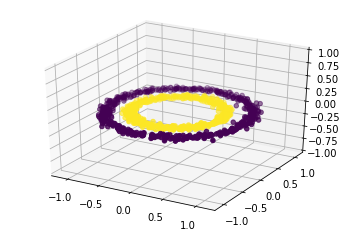

In [21]:
# Code which creates and visualizes the data
from sklearn.datasets import make_circles
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

coordinates, carbon = make_circles(n_samples=1000, factor=.65, noise=.05, random_state=1506)
coordinates = np.hstack([coordinates, np.random.normal(0,0.001,[1000,1])])

fig = plt.figure(); ax = fig.add_subplot(111, projection='3d')
ax.scatter(coordinates[:,0], coordinates[:,1], coordinates[:,2], c=carbon)
ax.set_zlim([-1,1])
plt.show()

### Exercise 7. a) (8 points)

Unfortunately, the hyperspectral images have been lost when one of NASA's a data centres was burned to the ground by extremists from the flat earth society. The scientist therefore wants to try to cluster the rocks in the two rings based on their 3D coordinates obtained from ordinary photos.  
  
1. Use a suitable clustering technique to cluster the two rings. (Outliers might need special care.)  
2. How close to the true classes (based on carbon quantification) can you come? Report this as a confusion matrix.

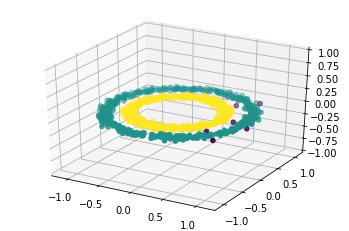

[[  0   0   0]
 [  6 494   0]
 [  0   0 500]]


In [22]:
# Code for 7. a)
# Can be solved by Agglomerative clustering too, here DBSCAN
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.1, min_samples=5, metric='euclidean')
y_db = db.fit_predict(coordinates)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(coordinates[:, 0], coordinates[:, 1], coordinates[:, 2], c=y_db)
ax.set_zlim([-1, 1])
plt.show()

from sklearn.metrics import confusion_matrix
print(confusion_matrix(carbon, y_db))

__Description/comments for 7. a)__  
Answer: Using DBSCAN, 6 points were deemed outliers, while the rest were perfectly classified.

### Exercise 7. b) (8 points)

The scientist's boss has only learned K-means clustering at the university, and tells the scientist this is the only credible way of clustering. Luckily, the scientist knows how to please/trick his boss by expressing the coordinates as polar coordinates instead.  
  
1. Drop the z-coordinate (third coordinate), transform the data into polar coordinates and plot the result in a scatter plot with colours for carbon amount.
2. Explain what more the scientist needs to do with the data before applying K-means clustering successfully on them? Do it, cluster and report again using confusion matrix!

In [23]:
def polar_coordinates(xy):
    r = np.sqrt(xy[:, 0]**2 + xy[:, 1]**2) # Distance to origin
    t = np.arctan2(xy[:, 0], xy[:, 1])     # Angle in radians
    rt = np.array([r, t]).T
    return rt

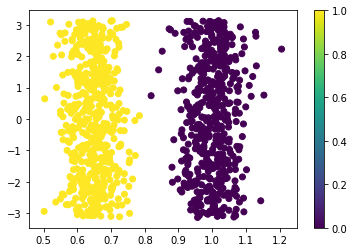

In [24]:
# Code for 7. b) part 1
X = polar_coordinates(coordinates[:, : 2])

import matplotlib.pyplot as plt
plt.scatter(X[:,0 ], X[:, 1], c=carbon)
plt.colorbar()
plt.show()

__Description/comments for 7. b)  part 1__  
Answer: K-means works best with spherical data. It would therefore be beneficial to scale the data first to obtain more comparable sizes in all directions.

In [25]:
# Code for 7. b) part 2
X_scale = StandardScaler().fit_transform(X)

from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, 
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(X_scale)
print(confusion_matrix(carbon, y_km))

[[  1 499]
 [500   0]]
